In [39]:
import os
import zipfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [40]:
os.listdir('Leaf Disease Detection-20230916T060414Z-001/Leaf Disease Detection')

['test', 'train']

In [41]:
base_dir  = 'Leaf Disease Detection-20230916T060414Z-001/Leaf Disease Detection'

train_dir = os.path.join(base_dir, 'train')
test_dir   = os.path.join(base_dir, 'test')

train_Healthy_dir = os.path.join(train_dir, 'Healthy')
train_Gray_Leaf_Spot_dir = os.path.join(train_dir, 'Gray_Leaf_Spot')
train_Blight_dir = os.path.join(train_dir, 'Blight')
train_Common_Rust_dir = os.path.join(train_dir, 'Common_Rust')

test_Healthy_dir = os.path.join(test_dir, 'Healthy')
test_Gray_Leaf_Spot_dir = os.path.join(test_dir, 'Gray_Leaf_Spot')
test_Blight_dir = os.path.join(test_dir, 'Blight')
test_Common_Rust_dir = os.path.join(test_dir, 'Common_Rust')

print(train_Healthy_dir, train_Gray_Leaf_Spot_dir, train_Blight_dir, train_Common_Rust_dir, test_Healthy_dir,test_Gray_Leaf_Spot_dir,
      
     test_Blight_dir, test_Common_Rust_dir, sep = '\n')


Leaf Disease Detection-20230916T060414Z-001/Leaf Disease Detection\train\Healthy
Leaf Disease Detection-20230916T060414Z-001/Leaf Disease Detection\train\Gray_Leaf_Spot
Leaf Disease Detection-20230916T060414Z-001/Leaf Disease Detection\train\Blight
Leaf Disease Detection-20230916T060414Z-001/Leaf Disease Detection\train\Common_Rust
Leaf Disease Detection-20230916T060414Z-001/Leaf Disease Detection\test\Healthy
Leaf Disease Detection-20230916T060414Z-001/Leaf Disease Detection\test\Gray_Leaf_Spot
Leaf Disease Detection-20230916T060414Z-001/Leaf Disease Detection\test\Blight
Leaf Disease Detection-20230916T060414Z-001/Leaf Disease Detection\test\Common_Rust


In [42]:
print('Number of training healthy leaf images     : ', len(os.listdir(train_Healthy_dir)))
print('Number of training Gray_Leaf_Spot images   : ', len(os.listdir(train_Gray_Leaf_Spot_dir)))
print('Number of training Blight images           : ', len(os.listdir(train_Blight_dir)))
print('Number of training Common_Rust images      : ', len(os.listdir(train_Common_Rust_dir)))

print('Number of testing healthy leaf images      : ', len(os.listdir(test_Healthy_dir)))
print('Number of testing Gray_Leaf_Spot images    : ', len(os.listdir(test_Gray_Leaf_Spot_dir)))
print('Number of testing Blight images            : ', len(os.listdir(test_Blight_dir)))
print('Number of testing Common_Rust images       : ', len(os.listdir(test_Common_Rust_dir)))

Number of training healthy leaf images     :  929
Number of training Gray_Leaf_Spot images   :  459
Number of training Blight images           :  916
Number of training Common_Rust images      :  1044
Number of testing healthy leaf images      :  233
Number of testing Gray_Leaf_Spot images    :  115
Number of testing Blight images            :  230
Number of testing Common_Rust images       :  262


(-0.5, 255.5, 255.5, -0.5)

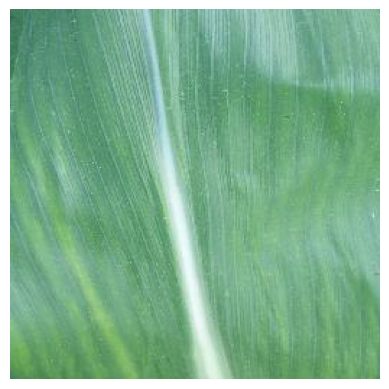

In [43]:
# Accessing and visualizing an image
Healthy_leaf_image_path = os.path.join(train_Healthy_dir,'Corn_Health (1008).jpg')
Healthy_leaf_image = mpimg.imread(Healthy_leaf_image_path)
plt.imshow(Healthy_leaf_image)
plt.axis('off')

In [44]:
Healthy_leaf_images = os.listdir(train_Healthy_dir)[:20]
Gray_Leaf_Spot_images = os.listdir(train_Gray_Leaf_Spot_dir)[:20]
Blight_images = os.listdir(train_Blight_dir)[:20]
Common_Rust_images = os.listdir(train_Common_Rust_dir)[:20]


Healthy_leaf_images_path = [os.path.join(train_Healthy_dir,image) for image in Healthy_leaf_images]
Gray_Leaf_Spot_images_path = [os.path.join(train_Gray_Leaf_Spot_dir,image) for image in Gray_Leaf_Spot_images]
Blight_images_path = [os.path.join(train_Blight_dir,image) for image in Blight_images]
Common_Rust_images_path = [os.path.join(train_Common_Rust_dir,image) for image in Common_Rust_images]

images_path = Healthy_leaf_images_path+Gray_Leaf_Spot_images_path+Blight_images_path+Common_Rust_images_path

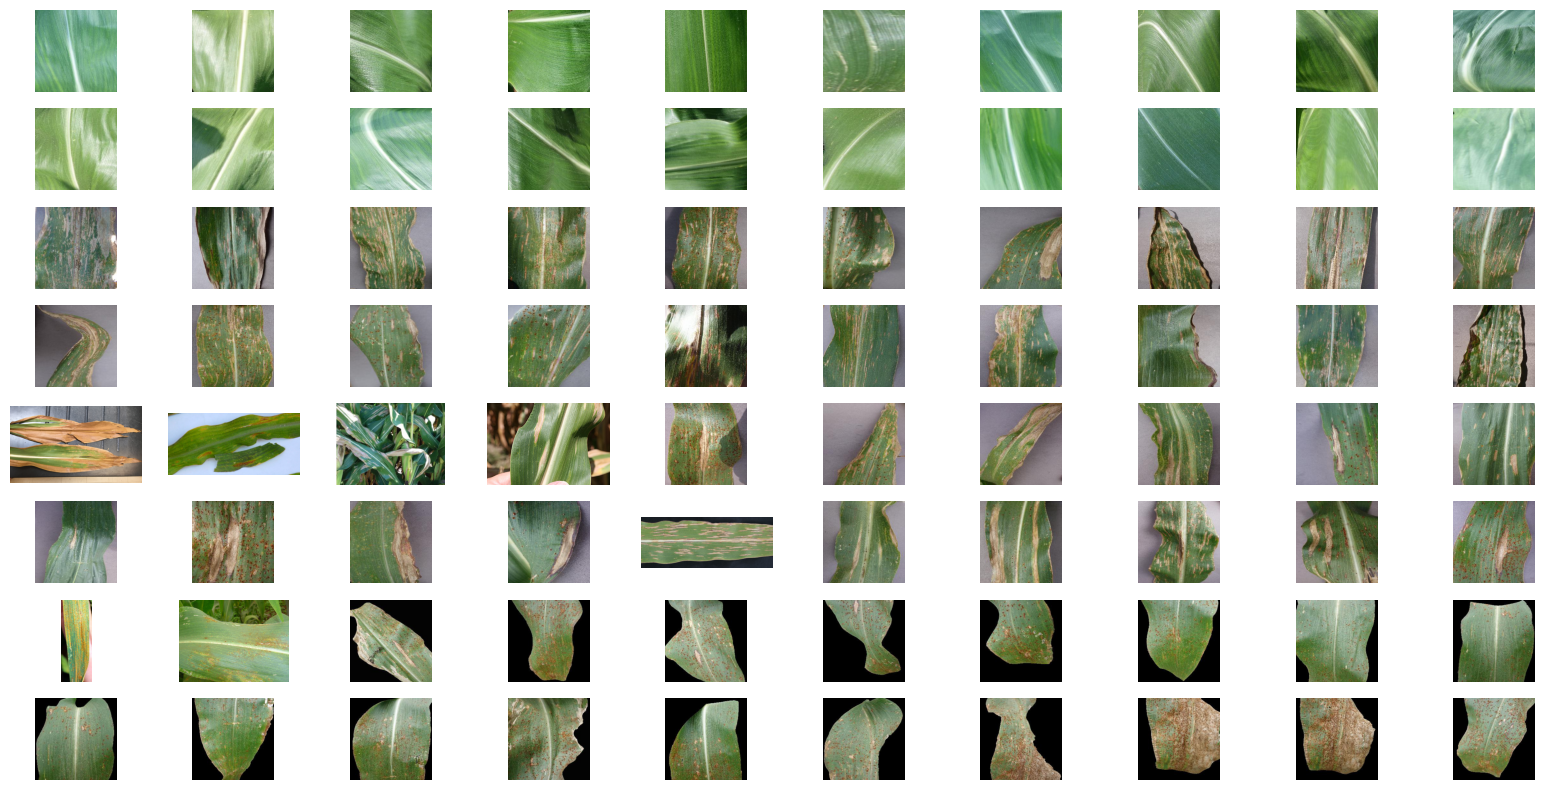

In [45]:
plt.figure(figsize = (20,10))
for i in range(80):
  plt.subplot(8,10, i+1)
  plt.axis('off')
  image = mpimg.imread(images_path[i])
  plt.imshow(image)

In [46]:
train_datagen = ImageDataGenerator(
    rescale = 1/255,
    rotation_range = 20,
    zoom_range = 20,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.1,
    vertical_flip = True,
    horizontal_flip = True
)

# flow_from_directory used when data is in secondary storage
train_generator = train_datagen.flow_from_directory(
    train_dir,                              # Training directory path
    target_size = (300,300),
    batch_size = 50,
    class_mode = 'categorical'
)
val_datagen = ImageDataGenerator(rescale = 1/255)
val_generator = val_datagen.flow_from_directory(
    test_dir,                               # Validation Directory path
    target_size = (300,300),
    batch_size = 50,
    class_mode = 'categorical'
)

Found 3348 images belonging to 4 classes.
Found 840 images belonging to 4 classes.


In [47]:
model = tf.keras.models.Sequential()
model.add(Conv2D(32,(5,5), activation = 'relu', input_shape = (300,300,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3), activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(Conv2D(128,(3,3), activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(256,(3,3), activation = 'relu'))
model.add(Conv2D(256,(3,3), activation = 'relu'))
model.add(MaxPooling2D())
model.add(Conv2D(512,(3,3), activation = 'relu'))
model.add(Conv2D(512,(3,3), activation = 'relu'))
model.add(MaxPooling2D())

model.add(Flatten())
model.add(Dense(200, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(4, 'softmax'))

model.summary(),

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 296, 296, 32)      2432      
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 148, 148, 32)      0         
 ng2D)                                                           
                                                                 
 conv2d_17 (Conv2D)          (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 73, 73, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_18 (Conv2D)          (None, 71, 71, 128)       73856     
                                                                 
 conv2d_19 (Conv2D)          (None, 69, 69, 128)      

(None,)

In [48]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = Adam(),
              metrics = ['Accuracy'])

In [49]:
history = model.fit(
    train_generator,
    validation_data = val_generator,
    epochs = 40,
    verbose = 1
)

Epoch 1/40
67/67 [==============================] - 591s 9s/step - loss: 0.9790 - Accuracy: 0.5197 - val_loss: 1.3988 - val_Accuracy: 0.4833
Epoch 2/40
67/67 [==============================] - 905s 14s/step - loss: 0.8568 - Accuracy: 0.5711 - val_loss: 1.1079 - val_Accuracy: 0.4786
Epoch 3/40
67/67 [==============================] - 1365s 21s/step - loss: 0.9127 - Accuracy: 0.5723 - val_loss: 1.1155 - val_Accuracy: 0.4619
Epoch 4/40
67/67 [==============================] - 557s 8s/step - loss: 0.8758 - Accuracy: 0.5935 - val_loss: 2.0211 - val_Accuracy: 0.4845
Epoch 5/40
67/67 [==============================] - 646s 10s/step - loss: 0.6772 - Accuracy: 0.7360 - val_loss: 1.2534 - val_Accuracy: 0.5679
Epoch 6/40
67/67 [==============================] - 544s 8s/step - loss: 0.5216 - Accuracy: 0.7841 - val_loss: 0.9944 - val_Accuracy: 0.5750
Epoch 7/40
67/67 [==============================] - 603s 9s/step - loss: 0.4786 - Accuracy: 0.7969 - val_loss: 1.1436 - val_Accuracy: 0.5631
Epoch 8/4

KeyboardInterrupt: 

In [ ]:
acc_train = history.history['Accuracy']
acc_val   = history.history['val_Accuracy']
num_epochs = range(1,41)


plt.figure(figsize = (16,6), dpi = 200)
plt.plot(num_epochs, acc_train, c = 'blue', label = 'Training Accuracy')
plt.plot(num_epochs, acc_val, c = 'red', label = 'Validation Accuracy')
plt.legend()